In [21]:
import numpy as np
import mitsuba as mi
import matplotlib as mpl
import matplotlib.pyplot as plt


try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

from sionna.rt import load_scene, Camera, Transmitter, Receiver, PlanarArray,\
                      PathSolver, RadioMapSolver, load_mesh, watt_to_dbm, transform_mesh,\
                      cpx_abs_square

no_preview = True

In [22]:
import sionna.rt


xml_file_path = '../sionna/hostel.xml'


try:
    scene = sionna.rt.load_scene(xml_file_path)
    print("Scene loaded successfully!")
except Exception as e:
    print(f"Error loading scene: {e}")


Scene loaded successfully!


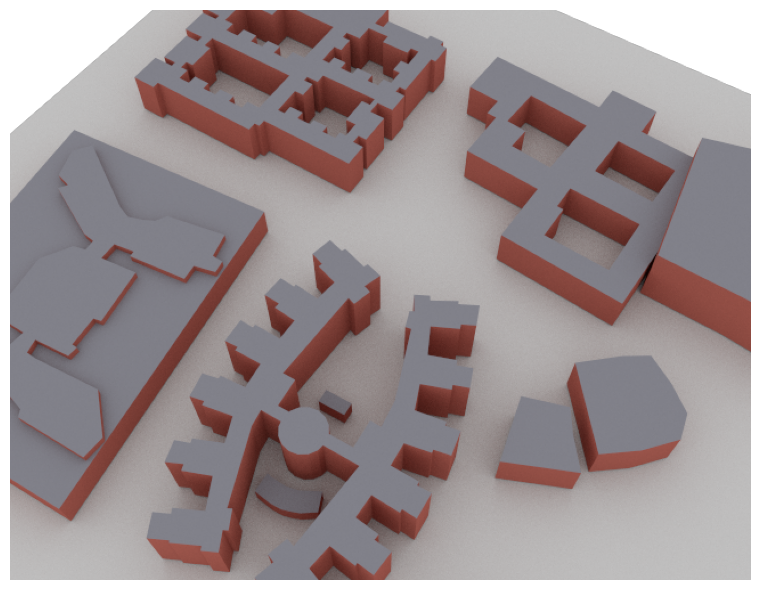

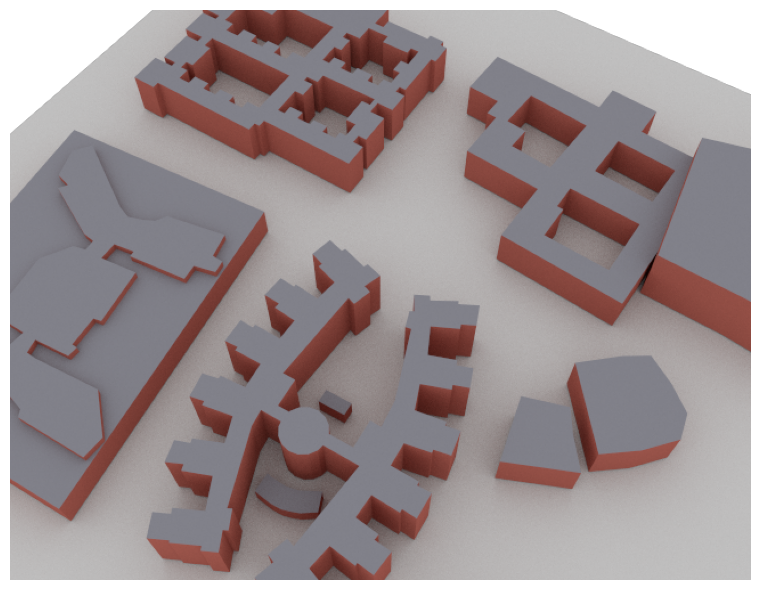

In [23]:

camera = sionna.rt.Camera(position=[-100, 150, 300], look_at=[0, 0, 0])


scene.render(camera=camera, resolution=[650, 500], num_samples=512)


In [24]:
scene.tx_array = PlanarArray(num_rows=2,
                             num_cols=2,
                             pattern="tr38901",
                             polarization="V")
scene.rx_array = scene.tx_array

In [25]:
#tx0 = Transmitter(name='tx0',
#                  position=[21.02,2.725,20],
 #                 power_dbm=44)
#scene.add(tx0)

In [26]:
tx1 = Transmitter(name='tx1',
                  position=[2.784,-68.49,15.97],
                  power_dbm=60)
#scene.add(tx1)

In [27]:
tx2 = Transmitter(name='tx2',
                  position=[-78.7,-6.02,14.69],
                  power_dbm=30)
scene.add(tx2)

In [28]:
rx1=Receiver(name="rx1",
             position=[-57.08,-45.39,14.3])

In [29]:
scene.add(rx1)

In [30]:
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               max_depth=5,           
               samples_per_tx=10**7 , 
               cell_size=(10,10),     
               center=[0, 0, 0],       
               size=[500, 500],       
               orientation=[0, 0, 0]) 

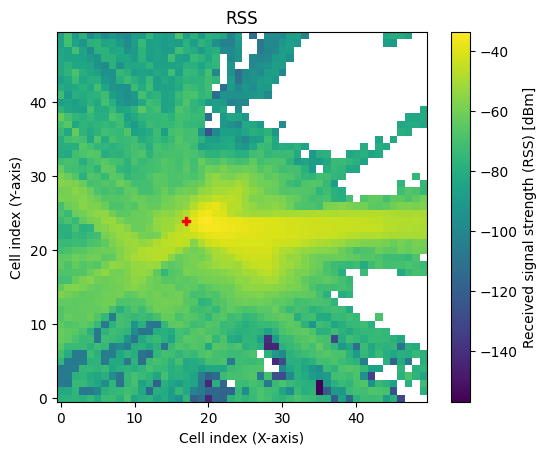

In [31]:
rm.show(metric="rss");

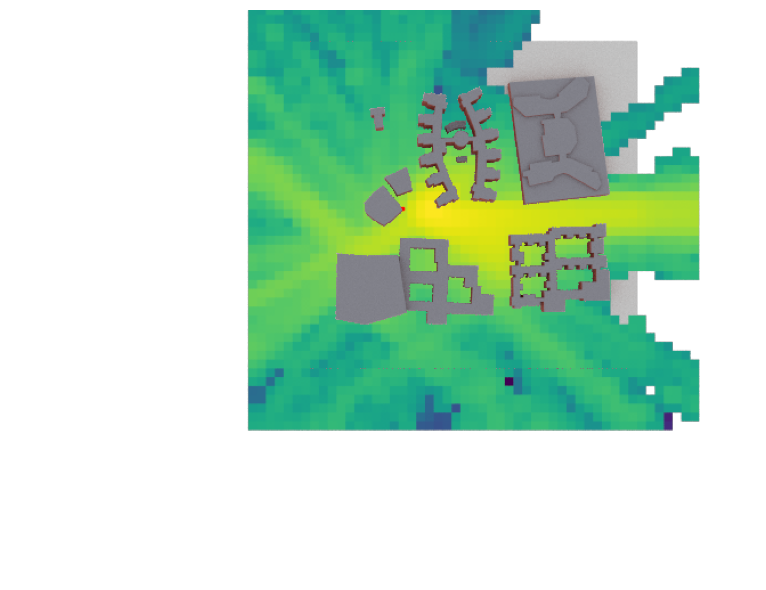

In [37]:
if no_preview:
  
    cam = Camera(position=[-100,-100,1000],
                     orientation=np.array([0,np.pi/2,-np.pi/2]))
    scene.render(camera=cam,
                        radio_map=rm,
                        rm_metric="rss"
                        );
else:
    scene.preview(radio_map=rm,
                         rm_metric="rss"
                         )